# Capstone Project 2: Time Series Forecasting for Sale Orders (Part 2)

# Tune Hyperparemeter

Used the same for the base model to tune hyperparemeter Q. Firstly, set the other hyperparemeter as P=7, D=2, S=7, got the smape as smape_D2. Secondly, set the other hyperparemeter as P=7, D=1, S=7, got the smape as smape_D1. By comparing these two results, it seems that when D=1, the model perform better (althought the excel research suggested that D=2).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
# fix the warning problem in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read pickle file into python
infile = open('C:\A\Education\Data Science\Capstone project 2\dataframe','rb')
df= pickle.load(infile)
infile.close()

In [3]:
df.head()

,order_count
order_purchase_timestamp_day,
2017-03-31,70
2017-04-01,68
2017-04-02,65
2017-04-03,72
2017-04-04,96


In [89]:
# visualize the research result when D=1
data = {'Q':[0,1,2,3,4,5,6,7],'smape_D2':[0.078231,0.067803,0.067559,0.072270,0.066720,0.069321,0.071007,0.068680],'smape_D1':[0.066381,0.066236,0.065491,0.066323,0.067041,0.066407,0.066125,0.066275]} 
research_result= pd.DataFrame(data)
print(research_result)

   Q  smape_D2  smape_D1
0  0  0.078231  0.066381
1  1  0.067803  0.066236
2  2  0.067559  0.065491
3  3  0.072270  0.066323
4  4  0.066720  0.067041
5  5  0.069321  0.066407
6  6  0.071007  0.066125
7  7  0.068680  0.066275


Text(0.5, 1.0, 'Q research result')

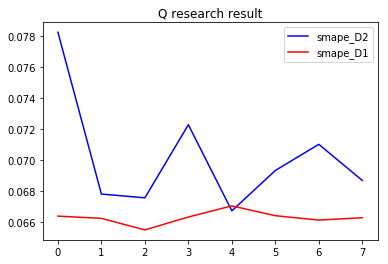

In [95]:
figsize=(60,15)
plt.plot( 'Q', 'smape_D2', data=research_result, color='blue')
plt.plot( 'Q', 'smape_D1', data=research_result, color='red')
plt.legend()
plt.title('Q research result')

Based on the research above, the optimal values for the hyperparameters are P=7, D=1, Q=2, S=7

# Conclusion

By using the optimal hyperparameters to predict the sales for the next 100 days, below chart shows big difference between predicted values and actual values. However, by appling one-step-head method, the predicted values are more accurate. To conclude, applying one-step-ahead method in time series forecasting will yield more accurate results.

In [102]:
df_train=df.iloc[:398]
# train the model with optimal parameters
model=SARIMAX(df_train,seasonal_order=(7,1,2,7),enforce_stationarity=False,enforce_invertibility=False)
# fit the model
results=model.fit()



In [103]:
FORECAST = 100
next100d = results.get_forecast(steps=FORECAST)
next100d_ci = next100d.conf_int()
futureDates = pd.date_range(start = '2018-05-05', periods=FORECAST)
next100d_ci.index = futureDates
 
futureDF = pd.DataFrame(np.array(next100d.predicted_mean), index=futureDates)
futureDF.head()


,0
2018-05-05,199.410046
2018-05-06,220.894688
2018-05-07,287.893438
2018-05-08,277.654436
2018-05-09,282.270824


Text(0.5, 0.98, 'Sales forecast')

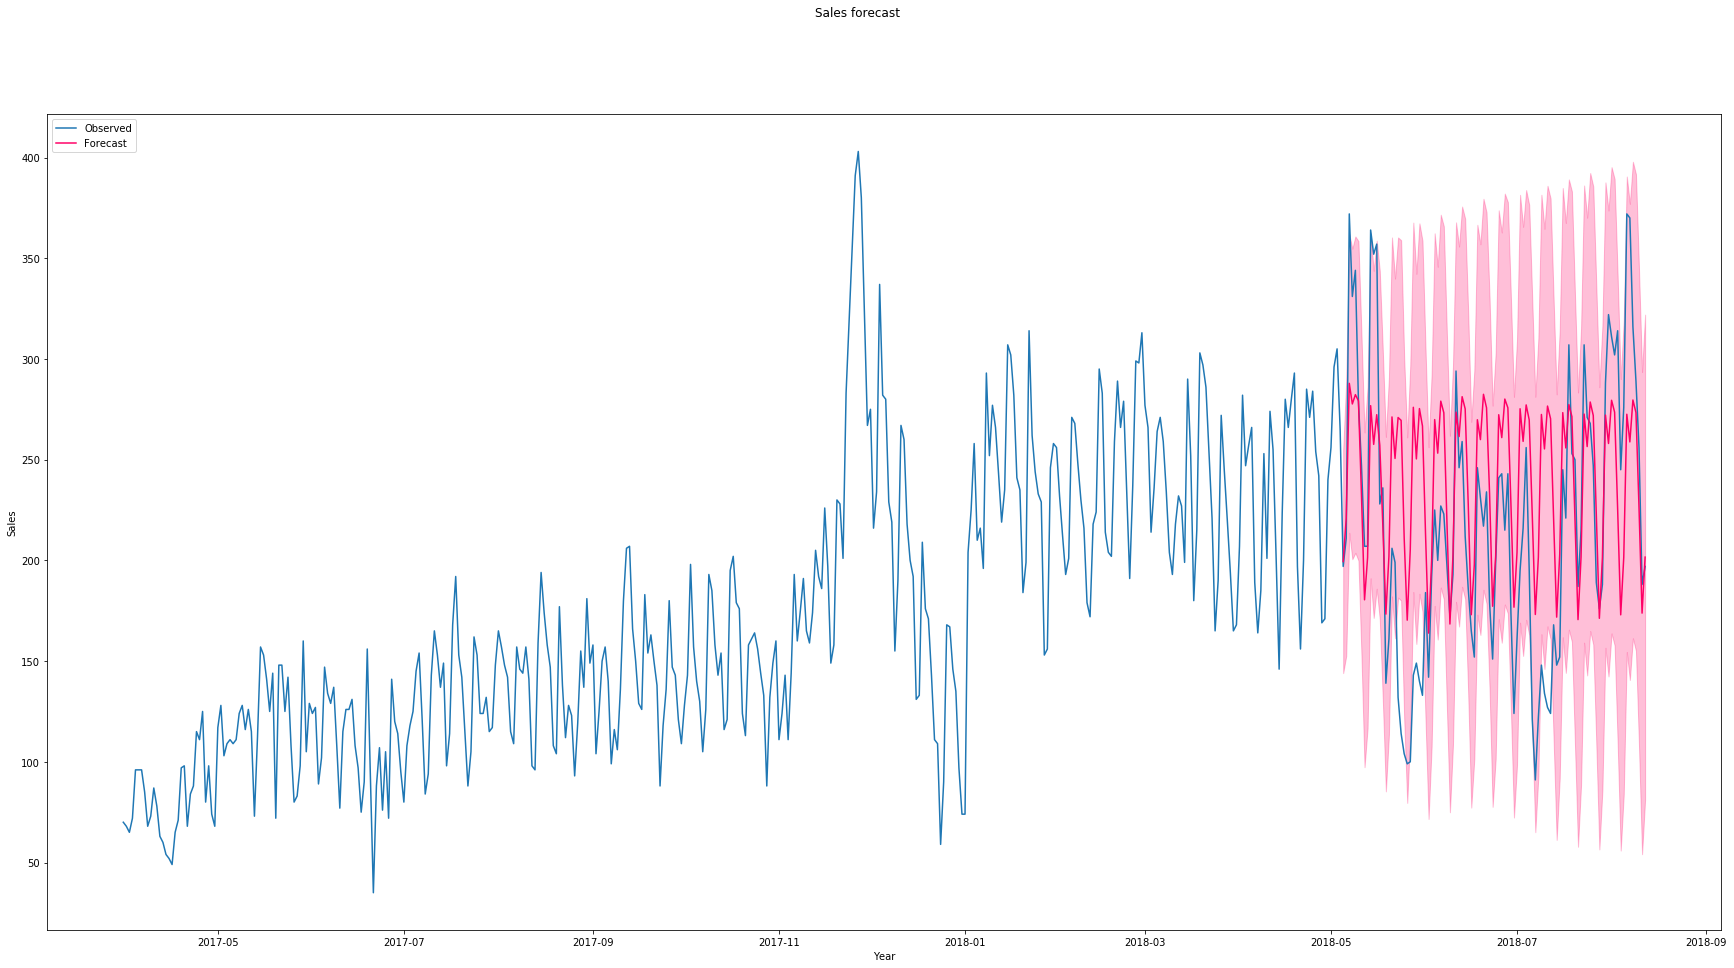

In [104]:
fig,ax = plt.subplots(figsize=(30,15))
ax.plot(df.order_count, label="Observed")
ax.plot(futureDF, label='Forecast', color='#ff0066');
  # draw confidence bound
ax.fill_between(next100d_ci.index,
                next100d_ci.iloc[:, 0],
                next100d_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
ax.set_xlabel("Year")
ax.set_ylabel("Sales")
 
ax.legend(loc='upper left')
fig.suptitle("Sales forecast")

In [106]:
# create empty list for error
fore_list=[]
#iterate n times to get n predicted values
for i in range(100):
    # split training dataset
    df_train=df.iloc[:398+i]
    # instantiate SARIMAX model, P=7, D=1, Q=2, S=7 
    model=SARIMAX(df_train,seasonal_order=(7,1,2,7),enforce_stationarity=False,enforce_invertibility=False)
    # train the model
    model_fit=model.fit()
    # get one step ahead forecast
    model_fore=model_fit.forecast()
    #convert model_fit (series object) to array 
    fore=model_fore.array
    # get the predicted value from array
    fore_val=fore[0]
    fore_list.append(fore_val)
    

In [111]:
FORECAST = 100
futureDates = pd.date_range(start = '2018-05-05', periods=FORECAST)
futureDF = pd.DataFrame(fore_list, index=futureDates)
futureDF.head()


,0
2018-05-05,199.410046
2018-05-06,219.139986
2018-05-07,280.769716
2018-05-08,338.657620
2018-05-09,322.391429


Text(0.5, 0.98, 'Sales forecast')

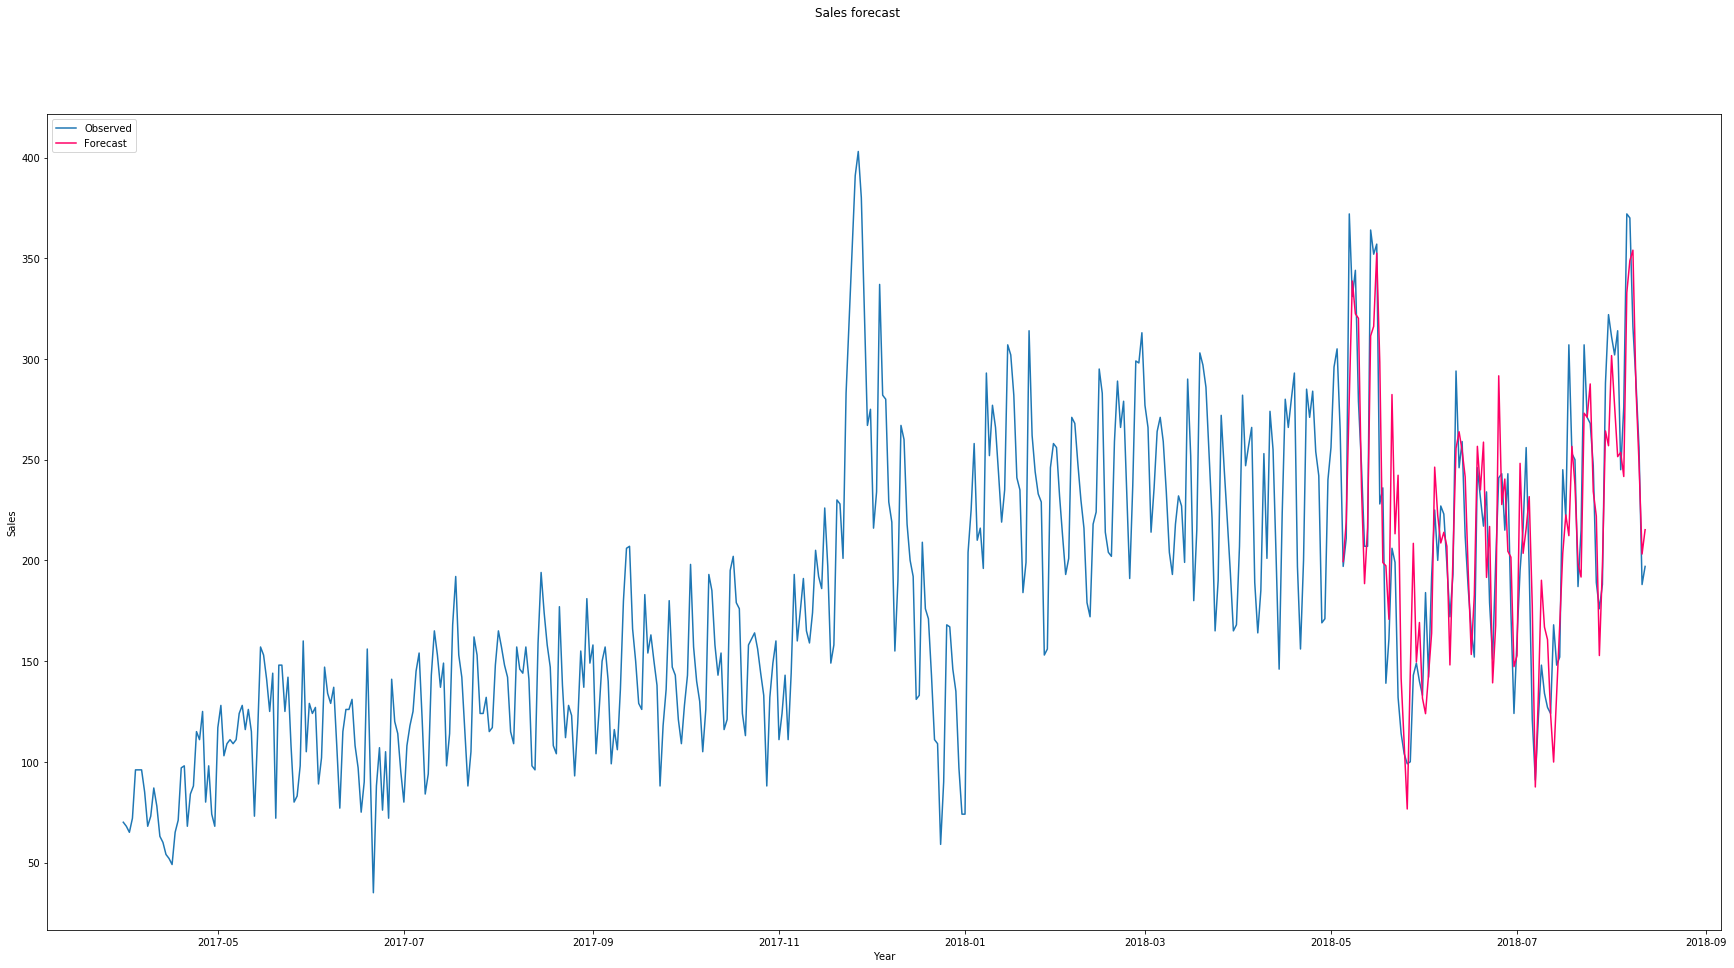

In [112]:
fig,ax = plt.subplots(figsize=(30,15))
ax.plot(df.order_count, label="Observed")
ax.plot(futureDF, label='Forecast', color='#ff0066');
  
ax.set_xlabel("Year")
ax.set_ylabel("Sales")
 
ax.legend(loc='upper left')
fig.suptitle("Sales forecast")